In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statistics as st
import math
import os

In [2]:
def get_path(ai_name, character_name):
    directory = 'ftg-data/Speedrunning/'
    return directory + ai_name + '/' + character_name

def get_proficiencies(ai_name, character_name):
    path = get_path(ai_name, character_name)
    files = os.listdir(path)
    proficiencies = []
    for file_name in files:
        df = pd.read_csv(path + '/' + file_name)
        result = df.iloc[-1]
        is_win_bin = float(result.agent_hp_percentage > result.target_hp_percentage)
        normalized_time = len(df) / 3600
        w1, w2, w3, w4 = 0.1, 0.1, 0.1, 0.1
        proficiency = (w1 * is_win_bin + w2 * (1 - normalized_time) + w3 * result.agent_hp_percentage + w4 * (1 - result.target_hp_percentage)) / (w1 + w2 + w3 + w4)
        proficiencies.append(proficiency)
    return proficiencies

In [3]:
ai_names = ['BlackMamba', 'WinOrGoHome', 'Thunder2021', 'ERHEA_PPO_PG', 'LTAI']
character_names = ['ZEN', 'GARNET', 'LUD']
colors = {
    'ZEN': 'lightblue',
    'GARNET': 'pink',
    'LUD': 'lightgreen'
}

In [4]:
ai_data = {}
for ai_name in ai_names:
    ai_data[ai_name] = {}
    for character_name in character_names:
        ai_data[ai_name][character_name] = get_proficiencies(ai_name, character_name)

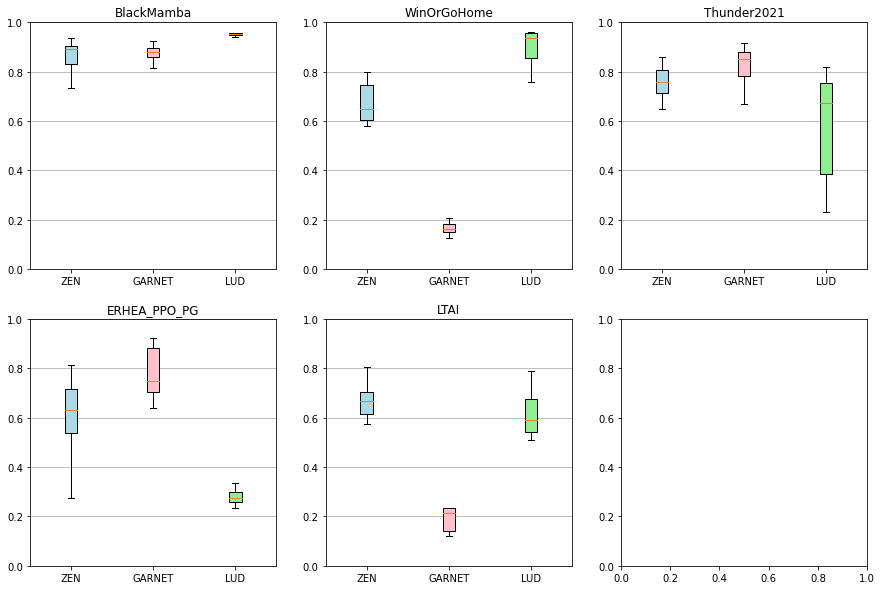

In [5]:
nrow = 2
ncol = 3
fig, axs = plt.subplots(nrow, ncol, figsize=(ncol * 5, nrow * 5))
for ax, ai_name in zip(fig.get_axes(), ai_data.keys()):
    data = ai_data[ai_name]
    ax.set_title(ai_name)
    ax.set_ylim([0, 1])
    ax.yaxis.grid(True)
    bp = ax.boxplot([data[x] for x in data.keys()]
                    , labels=data.keys()
                    , widths=.15
                    , patch_artist=True
                    , showfliers=False)
    for patch, color in zip(bp['boxes'], ['lightblue', 'pink', 'lightgreen']):
        patch.set_facecolor(color)
plt.show()